In [1]:
from tensorflow.keras.models import load_model
lanet5_model = load_model('sherlokholmes.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


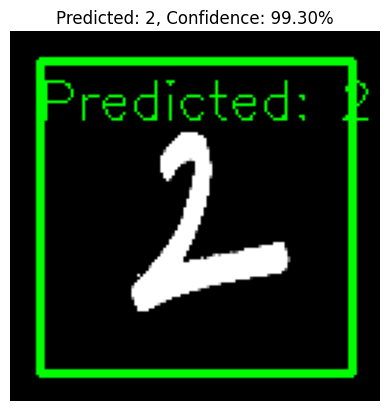

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from tensorflow.keras.models import load_model

lanet5_model = load_model('sherlokholmes.keras')

def preprocess_image(image_path):
    try:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise ValueError("Image not found or unable to read.")

        normalized_image = image.astype('float32') / 255

        input_image = np.expand_dims(normalized_image, axis=(0, -1)).astype('float32')

        return image, input_image
    except Exception as e:
        print(f"Error in preprocessing: {e}")
        return None, None

def predict_and_display(image_path, true_label):
    original_image, processed_image = preprocess_image(image_path)

    if processed_image is not None:
        prediction = lanet5_model.predict(processed_image)
        predicted_label = np.argmax(prediction)
        confidence = prediction[0][predicted_label] * 100

        color_image = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)

        height, width = color_image.shape[:2]
        cv2.rectangle(color_image, (10, 10), (width - 10, height - 10), (0, 255, 0), 2)

        text = f"Predicted: {predicted_label}, Confidence: {confidence:.2f}%"
        cv2.putText(color_image, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 1)

        plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(text)
        plt.show()

    else:
        print("Image preprocessing failed.")
predict_and_display('river/snake.png', true_label=1)

In [3]:
import cv2
import numpy as np

def preprocess_images(image_paths):
    processed_images = []

    for image_path in image_paths:

        image = cv2.imread(image_path)

        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        image = cv2.resize(image, (128, 128))

        image = image.astype('float32') / 255

        image = image.reshape(128, 128, 1)

        processed_images.append(image)
    return np.array(processed_images)
image_paths = ['Final/0_1.png', 'Final/0_10.png', 'Final/0_4.png', "Final/0_7.png"]
user_images = preprocess_images(image_paths)
predictions = lanet5_model.predict(user_images)
predicted_labels = np.argmax(predictions, axis=1)
print(f"Predicted Labels: {predicted_labels}")

confidence = prediction[0][predicted_label] * 100

print(f"The accuracy of the model is : {confidence:.2f}%")


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


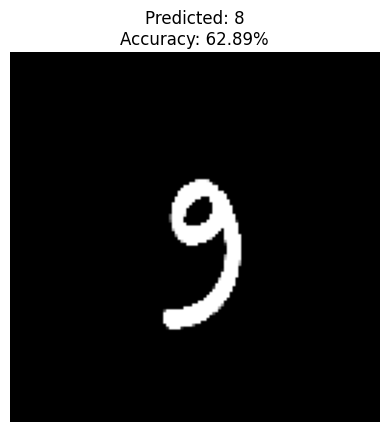

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


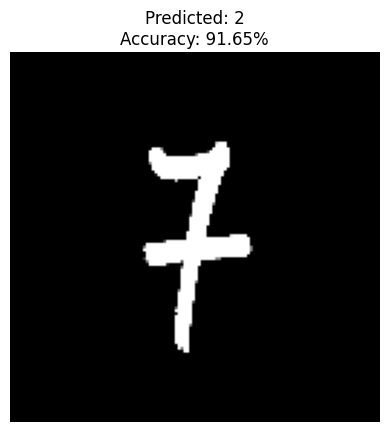

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


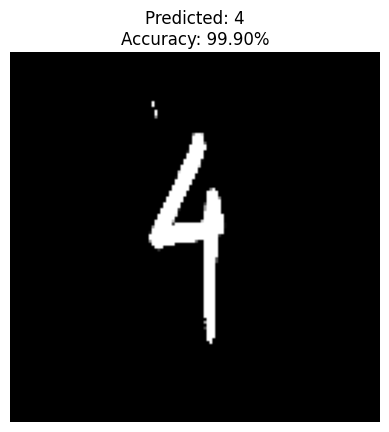

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


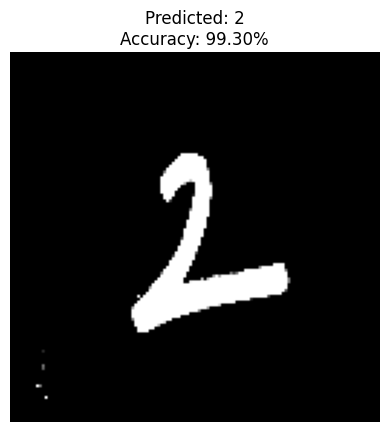

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


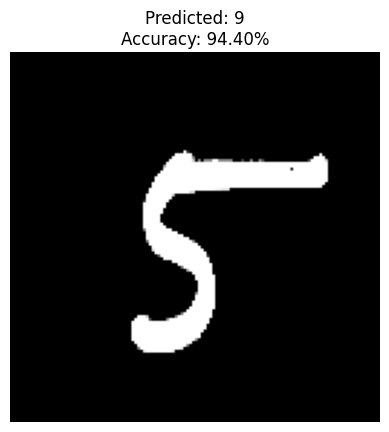

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


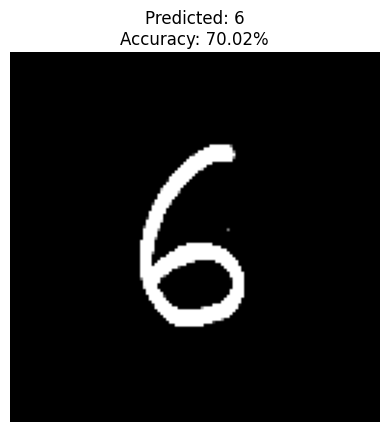

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


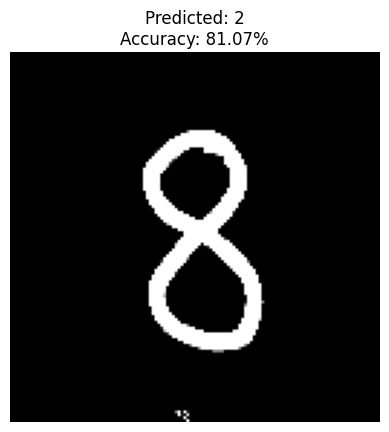

In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (128, 128))
    image = image.astype('float32') / 255
    image = image.reshape(1, 128, 128, 1)
    return image
input_folder = 'PreProcessedImage'
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, filename)
        user_image = preprocess_image(image_path)
        prediction = lanet5_model.predict(user_image)
        predicted_label = np.argmax(prediction)
        confidence = np.max(prediction) * 100
        original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(original_image, cmap='gray')
        plt.title(f"Predicted: {predicted_label}\nAccuracy: {confidence:.2f}%")
        plt.axis('off')
        plt.show()